> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments-May 2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.. 
### Dataset Description 
we are going to analize data from our csv data file
> 


### Question(s) for Analysis
Factors that affect Patient Showing up for thier schueduled appointmet


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check duplicates
df.duplicated().sum()

0

there is no duplicated values

In [5]:
#check duplicated id
df['PatientId'].duplicated().sum()


48228

In [6]:
#unique values number
df['PatientId'].nunique()

62299

we have 62299 unique values

In [7]:
#check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there is no missing values

In [8]:
# information about data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


min age is -1 and i will remove it , max is 115 , mean is 37

In [9]:
#getting row index for age value = -1
minus_age = df.query("Age == '-1'" )
minus_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [10]:
#correction data set coloum names
df.rename(columns={'No-show':'No_show'},inplace = True)
df.rename(columns={'Hipertension':'Hypertension'},inplace = True)

In [11]:
# remove minus age
df.drop(index=99832 ,inplace =True)

In [12]:
#remove duplicates
df.drop_duplicates(['PatientId','No_show'],inplace = True)

In [13]:
#cleaning data
df.drop(['ScheduledDay','AppointmentID','PatientId','AppointmentDay'], axis=1 ,inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

>after gathering data we explored the first 5  rows , then we checked if theres is duplicates or null values , then cleaned our data set by  droping usless information and renaming colums 


<a id='eda'></a>
## Exploratory Data Analysis
now we ready to explore our data after cleaning , now we are read to compute statitics and creat visualizations




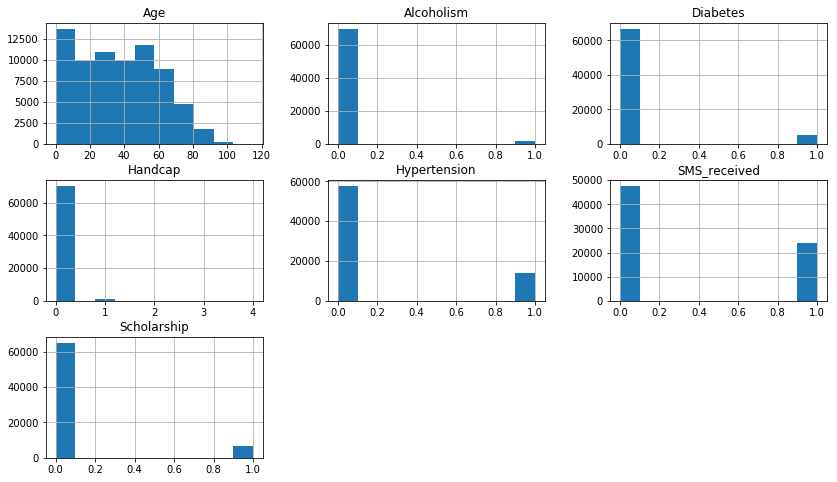

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(14,8));

In [15]:
#grouping data according showing or not
no_show = df.No_show =='Yes'
show = df.No_show =='No'
df[show].count(),df[no_show].count()


(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

non showed patients count is 17663 
and showed patients is 54154 which is greater 3 times

In [16]:
df[show].mean(),df[no_show].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age for showed patients is 37 , non showed is 34.                                                                        showed patients recived sms less than non showed so we should take care off our sms service

 ## Factors affect attendes rate

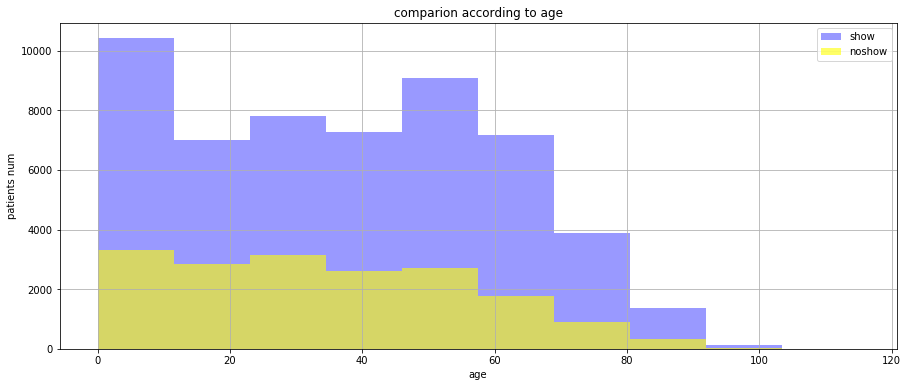

In [17]:
# The effect of age on attendance
def attendance(df,col,attend,no_attend):
    plt.figure(figsize=[15,6])
    df[col][show].hist(alpha=.4,bins=10,color='blue',label='show')
    df[col][no_show].hist(alpha=.6,bins=10,color='yellow',label='noshow')
    plt.legend();
    plt.title('comparion according to age')
    plt.xlabel('age')
    plt.ylabel('patients num');
attendance(df,'Age',show,no_show) 

ages from 0 to 8 is most showing , above 65 is the least

### does disease and age affect attenedce together

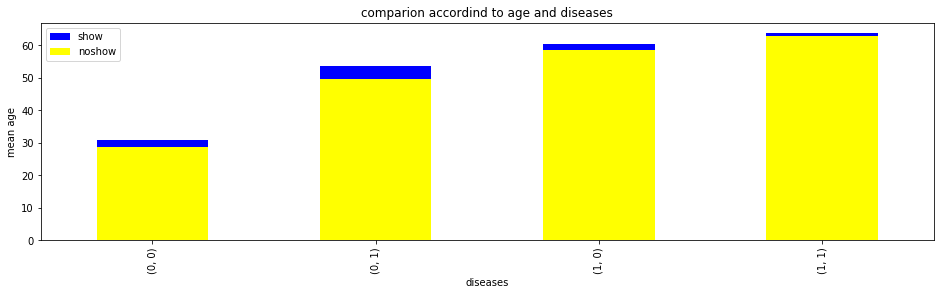

In [18]:
#disease and age affect on attenedce 
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color ='blue',label='show')
df[no_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='yellow',label='noshow')    
plt.legend();
plt.title('comparion accordind to age and diseases')
plt.xlabel('diseases')
plt.ylabel('mean age');

In [19]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[no_show].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

mean age of non chronic diseases showing patients is 30 and non showing is 28 and it means there is correlation between age and choronic diseases , mean age of hypertensive diabetic patients is about 64 and non showing is 63  and it means  no correlation between chornic diseases and attending 

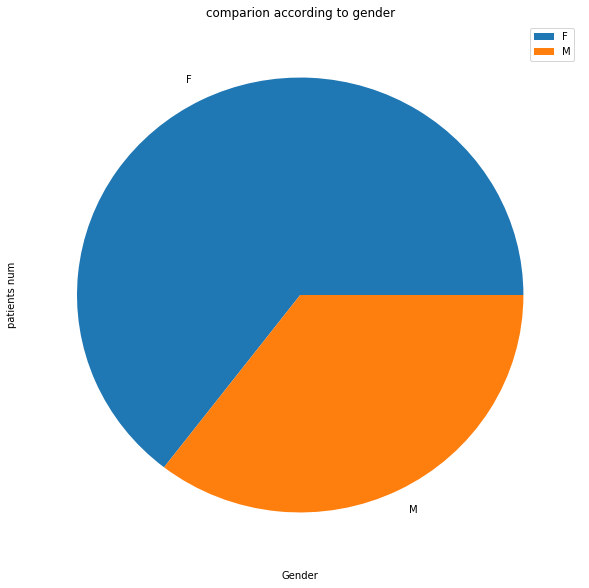

In [20]:
#percent of gender attending
def attendance(df,col,attend,no_attend):
    plt.figure(figsize=[10,10])
    df[col][show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparion according to gender')
    plt.xlabel('Gender')
    plt.ylabel('patients num');
attendance(df,'Gender',show,no_show) 

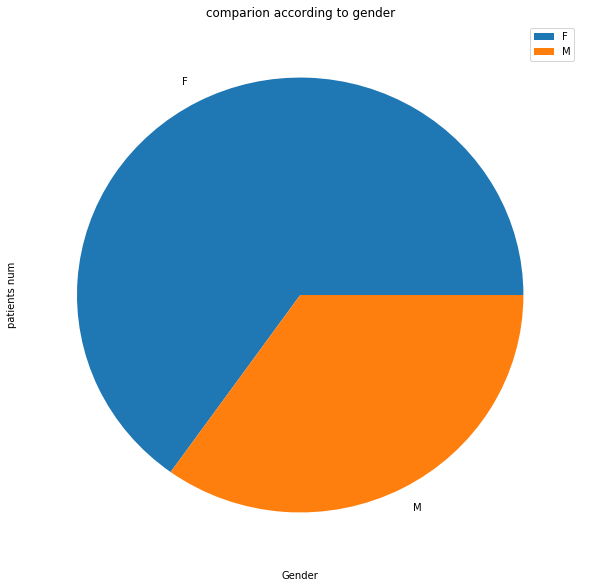

In [21]:
#percent of gender not attending
def attendance(df,col,attend,no_attend):
    plt.figure(figsize=[10,10])
    df[col][no_show].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title('comparion according to gender')
    plt.xlabel('Gender')
    plt.ylabel('patients num');
attendance(df,'Gender',show,no_show) 

gender doesn't effect attendance

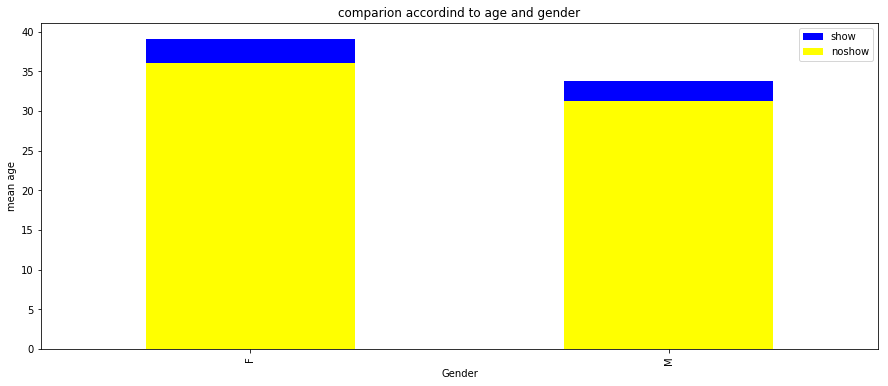

In [22]:
#affect gender and age on attendence
plt.figure(figsize=[15,6])
df[show].groupby('Gender').Age.mean().plot(kind='bar',color ='blue',label='show')
df[no_show].groupby('Gender').Age.mean().plot(kind='bar',color ='yellow',label='noshow')
plt.legend();
plt.title('comparion accordind to age and gender')
plt.xlabel('Gender')
plt.ylabel('mean age');

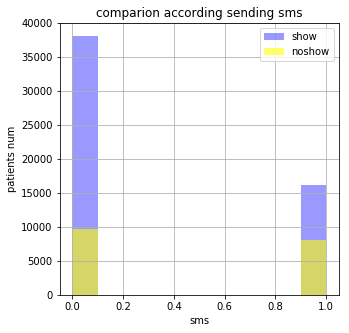

In [23]:
#does sms sending affect on attendence
def attendance(df,col,attend,no_attend):
    plt.figure(figsize=[5,5])
    df[col][show].hist(alpha=.4,bins=10,color='blue',label='show')
    df[col][no_show].hist(alpha=.6,bins=10,color='yellow',label='noshow')
    plt.legend();
    plt.title('comparion according sending sms')
    plt.xlabel('sms')
    plt.ylabel('patients num');
attendance(df,'SMS_received',show,no_show) 

number of showing patients without sms is greater than showing patients who recivied sms

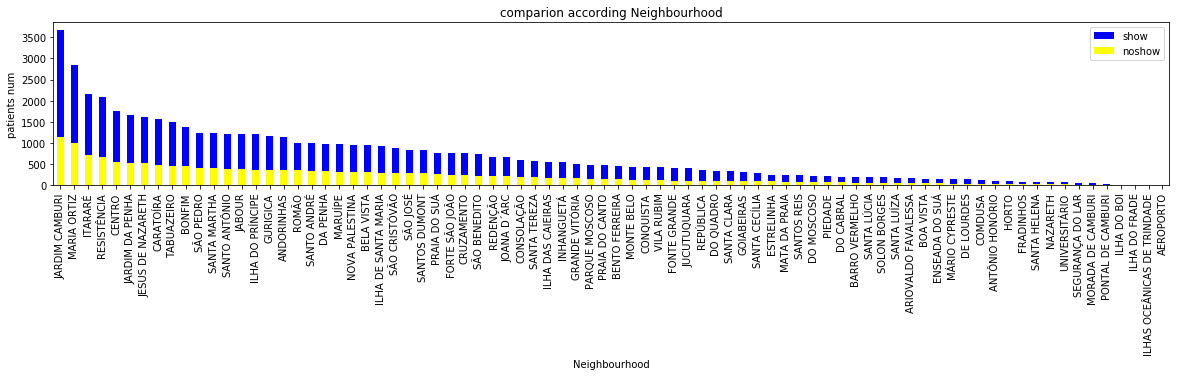

In [24]:
#neighbourhood effect on attendence
plt.figure(figsize=[20,3])
df.Neighbourhood[show].value_counts().plot(kind='bar',color ='blue',label='show')
df.Neighbourhood[no_show].value_counts().plot(kind='bar',color ='yellow',label='noshow')
plt.legend();
plt.title('comparion according Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('patients num');

neighborhood has major effect on attendence 

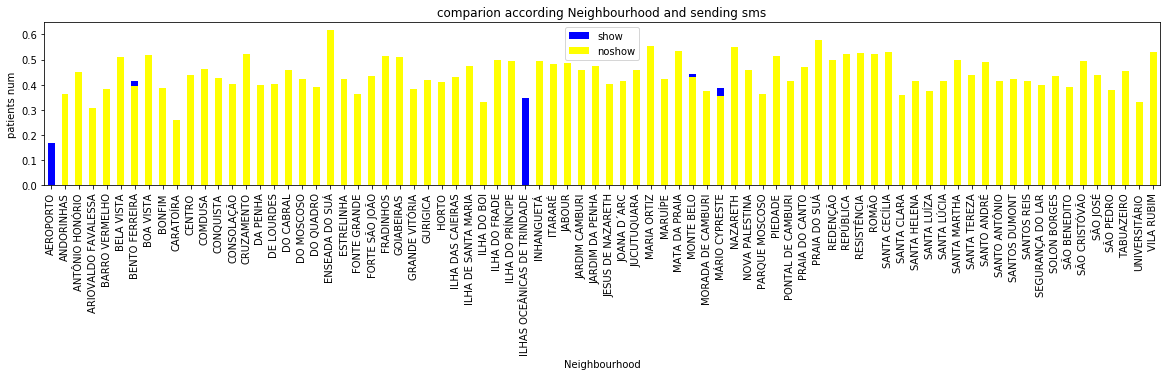

In [25]:
#neighbourhood and sms sending effect on attendence
plt.figure(figsize=[20,3])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color ='blue',label='show')
df[no_show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color ='yellow',label='noshow')
plt.legend();
plt.title('comparion according Neighbourhood and sending sms')
plt.xlabel('Neighbourhood')
plt.ylabel('patients num');

sms has response in only five neighbourhoods 

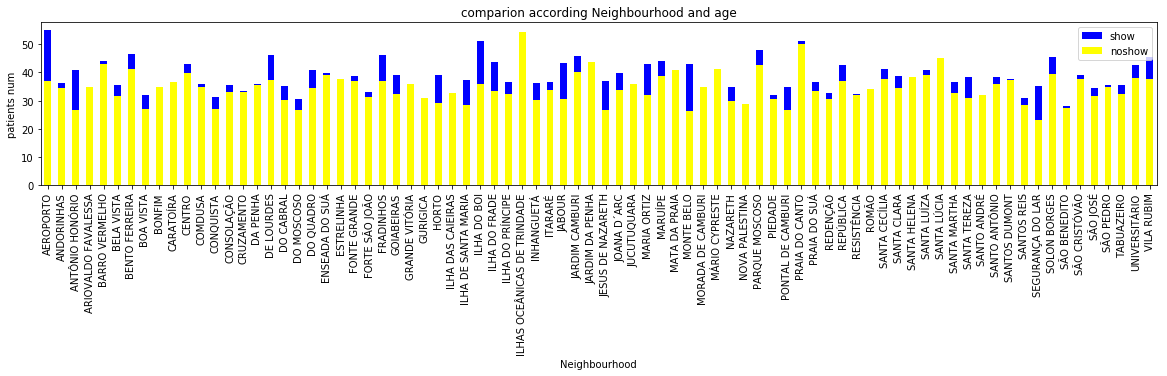

In [26]:
#neighbourhood and age effect on attendence
plt.figure(figsize=[20,3])
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color ='blue',label='show')
df[no_show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color ='yellow',label='noshow')
plt.legend();
plt.title('comparion according Neighbourhood and age')
plt.xlabel('Neighbourhood')
plt.ylabel('patients num');

patients attendense from specific neighborhood differ according ages 

<a id='conclusions'></a>
## Conclusions

number of patients attending without reciving sms is greater than who attended without reciving sms so we should take  care about sms 

neighbourhood is th most affecting factor on attendence
jardim camburi has the greates showing rate and also greatest patients number

Age has a clear effect on showing up
ages from 0 to 8 are the most attending 
ages above 65 are the least attending

## Limitations
there is no correlation between showing and gender , enrollment im walfare program , chornic diseases



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0